In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-15000-movies-dataset-with-credits/movie_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/tmdb-15000-movies-dataset-with-credits/movie_data.csv", lineterminator='\n')
df.head()

,Unnamed: 0,adult,backdrop_path,movie_id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew
0,0,False,/kQM7o3NIkruIZLoQ9E2XzZQ8Ujl.jpg,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",56.311,/onGdT8sYi89drvSJyEJnft97rOq.jpg,2022-02-04,Looop Lapeta,False,6.2,54,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn..."
1,1,False,/7w06baRS9VPm5RYz8lawTCLiR4j.jpg,592508,hi,Sooryavanshi,"A fearless, faithful albeit slightly forgetful...",45.077,/8p3mhjyLjHKtaAv8tFKfvEBtir0.jpg,2021-11-05,Sooryavanshi,False,5.8,133,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k..."
2,2,False,/sP9mRWiCxCuy17tUJfV8TpSZpqc.jpg,864692,hi,पठान,A soldier caught by enemies and presumed dead ...,47.611,/m1b9toKYyCujHuLoXB5GSDunO9e.jpg,2023-01-25,Pathaan,False,6.7,70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k..."
3,3,False,/vBmmJYv5asJpdJZsyPPc4MMpfBe.jpg,1018228,hi,चोर निकल के भागा,A flight attendant and her boyfriend must stea...,43.789,/1MIDERaEUMw1rYDM99tGZPY80Ap.jpg,2023-03-24,Chor Nikal Ke Bhaga,False,7.2,55,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '..."
4,4,False,/u7kuUaySqXBVAtqEl9vkTkAzHV9.jpg,20453,hi,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,37.260,/66A9MqXOyVFCssoloscw79z8Tew.jpg,2009-12-25,3 Idiots,False,8.0,2052,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k..."


In [3]:
df.columns

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'movie_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'genres', 'keywords', 'cast', 'crew'],
      dtype='object')

In [4]:
df.drop(columns=["Unnamed: 0", "adult", "backdrop_path", "video"], axis=1, inplace=True)

In [5]:
df.drop(columns=["poster_path"], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15871 entries, 0 to 15870
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           15871 non-null  int64  
 1   original_language  15871 non-null  object 
 2   original_title     15871 non-null  object 
 3   overview           15655 non-null  object 
 4   popularity         15871 non-null  float64
 5   release_date       15871 non-null  object 
 6   title              15871 non-null  object 
 7   vote_average       15871 non-null  float64
 8   vote_count         15871 non-null  int64  
 9   genres             15871 non-null  object 
 10  keywords           15871 non-null  object 
 11  cast               15871 non-null  object 
 12  crew               15871 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.6+ MB


### Yay! No Missing Values

In [7]:
df.head()

,movie_id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,genres,keywords,cast,crew
0,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",56.311,2022-02-04,Looop Lapeta,6.2,54,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn..."
1,592508,hi,Sooryavanshi,"A fearless, faithful albeit slightly forgetful...",45.077,2021-11-05,Sooryavanshi,5.8,133,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k..."
2,864692,hi,पठान,A soldier caught by enemies and presumed dead ...,47.611,2023-01-25,Pathaan,6.7,70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k..."
3,1018228,hi,चोर निकल के भागा,A flight attendant and her boyfriend must stea...,43.789,2023-03-24,Chor Nikal Ke Bhaga,7.2,55,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '..."
4,20453,hi,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,37.260,2009-12-25,3 Idiots,8.0,2052,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k..."


In [8]:
def separate_year(date):
    date = date.split("-")
    date = date[0]
    return date

In [9]:
df["release_year"] = df["release_date"].apply(separate_year)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15871 entries, 0 to 15870
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           15871 non-null  int64  
 1   original_language  15871 non-null  object 
 2   original_title     15871 non-null  object 
 3   overview           15655 non-null  object 
 4   popularity         15871 non-null  float64
 5   release_date       15871 non-null  object 
 6   title              15871 non-null  object 
 7   vote_average       15871 non-null  float64
 8   vote_count         15871 non-null  int64  
 9   genres             15871 non-null  object 
 10  keywords           15871 non-null  object 
 11  cast               15871 non-null  object 
 12  crew               15871 non-null  object 
 13  release_year       15871 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.7+ MB


In [11]:
df["original_language"].value_counts()

en    7640
hi    5918
fr     683
it     432
ja     307
es     218
de     113
ko      96
zh      69
cn      68
ru      52
pt      46
sv      41
da      35
no      24
pl      21
tr      14
nl      14
th      11
fa       8
hu       8
id       7
fi       7
is       4
el       4
cs       4
te       3
sr       3
ar       3
ro       2
eu       2
uk       2
et       1
la       1
he       1
nb       1
af       1
bn       1
ml       1
hy       1
bs       1
gl       1
sh       1
km       1
Name: original_language, dtype: int64

In [12]:
false_count = 0
for original_title, title in df[["original_title", "title"]].values:
    if original_title != title:
        false_count += 1

In [13]:
false_count 

3867

In [14]:
df = df.drop(columns=["original_title", "release_date"], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15871 entries, 0 to 15870
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           15871 non-null  int64  
 1   original_language  15871 non-null  object 
 2   overview           15655 non-null  object 
 3   popularity         15871 non-null  float64
 4   title              15871 non-null  object 
 5   vote_average       15871 non-null  float64
 6   vote_count         15871 non-null  int64  
 7   genres             15871 non-null  object 
 8   keywords           15871 non-null  object 
 9   cast               15871 non-null  object 
 10  crew               15871 non-null  object 
 11  release_year       15871 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


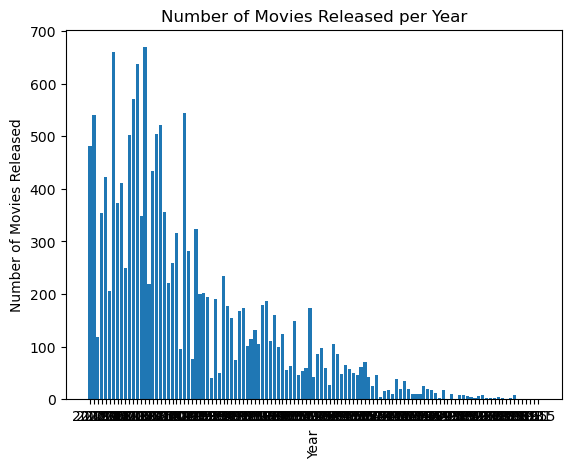

In [16]:
import matplotlib.pyplot as plt

year_counts = {}
for year in df["release_year"]:
    year_counts[year] = year_counts.get(year, 0) + 1
    
years = list(year_counts.keys())
counts = list(year_counts.values())

# Create the bar plot
plt.bar(years, counts)

# Customize the plot
plt.xlabel('Year', rotation=90)
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')

# Display the plot
plt.show()

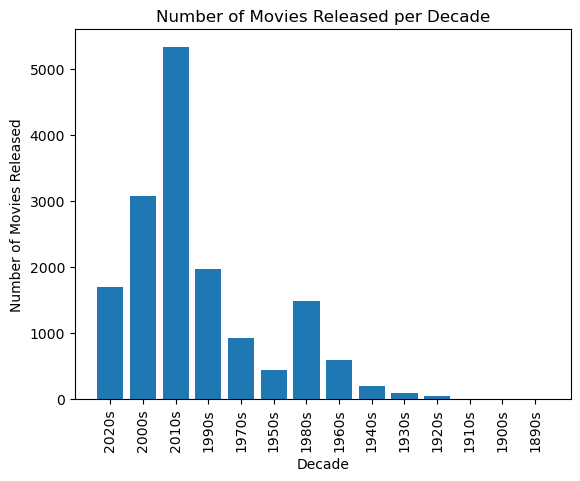

In [17]:

# Count the number of movies in each decade
decade_counts = {}
for year in df["release_year"]:
    decade = str(year)[:3] + "0s"
    decade_counts[decade] = decade_counts.get(decade, 0) + 1

# Prepare data for plotting
decades = list(decade_counts.keys())
counts = list(decade_counts.values())

# Create the bar plot
plt.bar(decades, counts)

# Customize the plot
plt.xlabel('Decade')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Decade')

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Enough with the visualization and preprocessing
## Let's get into the good stuff
## *First Let's do **Content-based Filtering** on Overview and we kick off from that*

In [18]:
df["overview"] = df["overview"].fillna("")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15871 entries, 0 to 15870
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           15871 non-null  int64  
 1   original_language  15871 non-null  object 
 2   overview           15871 non-null  object 
 3   popularity         15871 non-null  float64
 4   title              15871 non-null  object 
 5   vote_average       15871 non-null  float64
 6   vote_count         15871 non-null  int64  
 7   genres             15871 non-null  object 
 8   keywords           15871 non-null  object 
 9   cast               15871 non-null  object 
 10  crew               15871 non-null  object 
 11  release_year       15871 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


In [19]:
overview_cbf = df[["title", "overview"]]

In [20]:
overview_cbf.head()

,title,overview
0,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav..."
1,Sooryavanshi,"A fearless, faithful albeit slightly forgetful..."
2,Pathaan,A soldier caught by enemies and presumed dead ...
3,Chor Nikal Ke Bhaga,A flight attendant and her boyfriend must stea...
4,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...


In [21]:
overview_cbf.loc[:, ("overview")] = overview_cbf["overview"].fillna("Unknown")

/tmp/ipykernel_21/62874847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overview_cbf.loc[:, ("overview")] = overview_cbf["overview"].fillna("Unknown")


In [22]:
overview_cbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15871 entries, 0 to 15870
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     15871 non-null  object
 1   overview  15871 non-null  object
dtypes: object(2)
memory usage: 248.1+ KB


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 3), stop_words="english")
sparse_overview = vectorizer.fit_transform(overview_cbf["overview"])

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(sparse_overview, sparse_overview)

In [25]:
def get_movie_recommendations(user_movie, top_k=10):
    user_profile = overview_cbf[overview_cbf["title"] == user_movie]["overview"]
    # Convert user profile to feature vector
    user_features = vectorizer.transform([user_profile.values[0]])

    # Calculate similarity between user profile and all movies
    similarities = cosine_similarity(user_features, sparse_overview).flatten()

    # Sort movies based on similarity and get top recommendations
    indices = similarities.argsort()[::-1][:top_k]
    recommended_movies = overview_cbf.iloc[indices]

    return recommended_movies

In [26]:
get_movie_recommendations("Dhoom 2", 20)

,title,overview
33,Dhoom 2,"Jai and Ali return, this time on the trail of ..."
11482,Dhoom 2,"Jai and Ali return, this time on the trail of ..."
5943,BTS World Tour: Love Yourself in Seoul,Shot at the Olympic Stadium in Seoul during th...
12448,Central Intelligence,After he reunites with an old pal through Face...
41,The Lunchbox,A mistaken delivery in Mumbai's famously effic...
8000,The Lunchbox,A mistaken delivery in Mumbai's famously effic...
11507,I'm Not There,Six actors portray six personas of music legen...
12320,Life,The six-member crew of the International Space...
5608,Plot No. 666,Jayasaptagiri Productions in association with ...
9969,The Hitman's Bodyguard,"The world’s top bodyguard gets a new client, a..."


In [27]:
df["title"].head(50)

0                            Looop Lapeta
1                            Sooryavanshi
2                                 Pathaan
3                     Chor Nikal Ke Bhaga
4                                3 Idiots
5                         My Name Is Khan
6             Dilwale Dulhania Le Jayenge
7                                 Dhamaka
8              Brahmāstra Part One: Shiva
9                               Andhadhun
10                           Om Shanti Om
11                            Blood Money
12               Kabhi Khushi Kabhie Gham
13                                Dhoom 3
14                                Gumraah
15                                 Dangal
16                                  Kites
17    Commando 2 -  The Black Money Trail
18                 Kabhi Alvida Naa Kehna
19                    Like Stars on Earth
20                                  Drive
21                     Kuch Kuch Hota Hai
22                              Bodyguard
23                                

> ## Content based filtering with overview showed promising results. However, it is not been specialized for an actor or a specific genre or even a movie released date or original language of the movie next we will do just that. Improve this content based filtering.

In [28]:
df.head()

,movie_id,original_language,overview,popularity,title,vote_average,vote_count,genres,keywords,cast,crew,release_year
0,783461,hi,"When her boyfriend loses a mobster's cash, Sav...",56.311,Looop Lapeta,6.2,54,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn...",2022
1,592508,hi,"A fearless, faithful albeit slightly forgetful...",45.077,Sooryavanshi,5.8,133,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...",2021
2,864692,hi,A soldier caught by enemies and presumed dead ...,47.611,Pathaan,6.7,70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k...",2023
3,1018228,hi,A flight attendant and her boyfriend must stea...,43.789,Chor Nikal Ke Bhaga,7.2,55,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '...",2023
4,20453,hi,Rascal. Joker. Dreamer. Genius... You've never...,37.260,3 Idiots,8.0,2052,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k...",2009


In [29]:
df["genres"].iloc[0]

type(df["genres"].iloc[0])
eval(df["genres"].iloc[0])

[{'id': 28, 'name': 'Action'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'}]

In [30]:
def extract_genre(genre):
    genre = eval(genre)
    genres = []
    for i in genre:
        genres.append(i["name"])
    return genres

In [31]:
df["genres"] = df["genres"].apply(extract_genre)

In [32]:
df.head()

,movie_id,original_language,overview,popularity,title,vote_average,vote_count,genres,keywords,cast,crew,release_year
0,783461,hi,"When her boyfriend loses a mobster's cash, Sav...",56.311,Looop Lapeta,6.2,54,"[Action, Comedy, Crime]","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn...",2022
1,592508,hi,"A fearless, faithful albeit slightly forgetful...",45.077,Sooryavanshi,5.8,133,"[Action, Crime, Thriller]","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...",2021
2,864692,hi,A soldier caught by enemies and presumed dead ...,47.611,Pathaan,6.7,70,"[Action, Adventure, Thriller]","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k...",2023
3,1018228,hi,A flight attendant and her boyfriend must stea...,43.789,Chor Nikal Ke Bhaga,7.2,55,"[Crime, Thriller]","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '...",2023
4,20453,hi,Rascal. Joker. Dreamer. Genius... You've never...,37.260,3 Idiots,8.0,2052,"[Drama, Comedy]","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k...",2009


In [33]:
df["cast"].iloc[0]

"[{'adult': False, 'gender': 1, 'id': 550167, 'known_for_department': 'Acting', 'name': 'Taapsee Pannu', 'original_name': 'Taapsee Pannu', 'popularity': 6.156, 'profile_path': '/u9Gwg3J0bdczTPunP8qoWK2Vhu4.jpg', 'cast_id': 1, 'character': 'Savi', 'credit_id': '5ff5b30128723c0040af9605', 'order': 0}, {'adult': False, 'gender': 2, 'id': 1714229, 'known_for_department': 'Acting', 'name': 'Tahir Raj Bhasin', 'original_name': 'Tahir Raj Bhasin', 'popularity': 2.203, 'profile_path': '/A4ylMYWj8IqnmX74Two8c4Lp8jY.jpg', 'cast_id': 3, 'character': 'Satya', 'credit_id': '5ff5b31dd38b580043cb4047', 'order': 1}, {'adult': False, 'gender': 1, 'id': 2092738, 'known_for_department': 'Acting', 'name': 'Shreya Dhanwanthary', 'original_name': 'Shreya Dhanwanthary', 'popularity': 8.802, 'profile_path': '/dSWHYuEWjPzczAzdLFgYHt3Y5Dd.jpg', 'cast_id': 15, 'character': 'Julia', 'credit_id': '6136133e2cde980089dc0082', 'order': 2}, {'adult': False, 'gender': 2, 'id': 101823, 'known_for_department': 'Acting', 

In [34]:
def get_actor_name(cast):
    cast = eval(cast)
    actors = []
    for i in cast:
        actors.append(i["name"])
    return actors

In [35]:
df["cast"] = df["cast"].apply(get_actor_name)

In [36]:
df.head()

,movie_id,original_language,overview,popularity,title,vote_average,vote_count,genres,keywords,cast,crew,release_year
0,783461,hi,"When her boyfriend loses a mobster's cash, Sav...",56.311,Looop Lapeta,6.2,54,"[Action, Comedy, Crime]","['remake', 'looop lapeta', 'saade saati']","[Taapsee Pannu, Tahir Raj Bhasin, Shreya Dhanw...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn...",2022
1,592508,hi,"A fearless, faithful albeit slightly forgetful...",45.077,Sooryavanshi,5.8,133,"[Action, Crime, Thriller]","['police', 'sequel', 'police officer', 'cop un...","[Akshay Kumar, Katrina Kaif, Ajay Devgn, Ranve...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...",2021
2,864692,hi,A soldier caught by enemies and presumed dead ...,47.611,Pathaan,6.7,70,"[Action, Adventure, Thriller]","['spy', 'fake death', 'spy thriller', 'spy uni...","[Shah Rukh Khan, Deepika Padukone, John Abraha...","[{'adult': False, 'gender': 2, 'id': 35771, 'k...",2023
3,1018228,hi,A flight attendant and her boyfriend must stea...,43.789,Chor Nikal Ke Bhaga,7.2,55,"[Crime, Thriller]","['heist', 'airplane hijacking']","[Yami Gautam, Sunny Kaushal, Sharad Kelkar, In...","[{'adult': False, 'gender': 2, 'id': 102246, '...",2023
4,20453,hi,Rascal. Joker. Dreamer. Genius... You've never...,37.260,3 Idiots,8.0,2052,"[Drama, Comedy]","['suicide', 'suicide attempt', 'college', 'mus...","[Aamir Khan, R. Madhavan, Sharman Joshi, Karee...","[{'adult': False, 'gender': 2, 'id': 35779, 'k...",2009


In [37]:
print(type(df["release_year"].iloc[0]))

<class 'str'>


In [38]:
df.columns

Index(['movie_id', 'original_language', 'overview', 'popularity', 'title',
       'vote_average', 'vote_count', 'genres', 'keywords', 'cast', 'crew',
       'release_year'],
      dtype='object')

In [39]:
cbf_extended = df[["original_language", "overview", "title", "genres", "cast", "release_year"]]

In [40]:
cbf_extended.head()

,original_language,overview,title,genres,cast,release_year
0,hi,"When her boyfriend loses a mobster's cash, Sav...",Looop Lapeta,"[Action, Comedy, Crime]","[Taapsee Pannu, Tahir Raj Bhasin, Shreya Dhanw...",2022
1,hi,"A fearless, faithful albeit slightly forgetful...",Sooryavanshi,"[Action, Crime, Thriller]","[Akshay Kumar, Katrina Kaif, Ajay Devgn, Ranve...",2021
2,hi,A soldier caught by enemies and presumed dead ...,Pathaan,"[Action, Adventure, Thriller]","[Shah Rukh Khan, Deepika Padukone, John Abraha...",2023
3,hi,A flight attendant and her boyfriend must stea...,Chor Nikal Ke Bhaga,"[Crime, Thriller]","[Yami Gautam, Sunny Kaushal, Sharad Kelkar, In...",2023
4,hi,Rascal. Joker. Dreamer. Genius... You've never...,3 Idiots,"[Drama, Comedy]","[Aamir Khan, R. Madhavan, Sharman Joshi, Karee...",2009


In [41]:
def list_to_str(list):
    return " ".join(list)

In [42]:
cbf_extended["genres"] = cbf_extended["genres"].apply(list_to_str)
cbf_extended["cast"] = cbf_extended["cast"].apply(list_to_str)

/tmp/ipykernel_21/1512033717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbf_extended["genres"] = cbf_extended["genres"].apply(list_to_str)
/tmp/ipykernel_21/1512033717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbf_extended["cast"] = cbf_extended["cast"].apply(list_to_str)


In [43]:
cbf_extended.head()

,original_language,overview,title,genres,cast,release_year
0,hi,"When her boyfriend loses a mobster's cash, Sav...",Looop Lapeta,Action Comedy Crime,Taapsee Pannu Tahir Raj Bhasin Shreya Dhanwant...,2022
1,hi,"A fearless, faithful albeit slightly forgetful...",Sooryavanshi,Action Crime Thriller,Akshay Kumar Katrina Kaif Ajay Devgn Ranveer S...,2021
2,hi,A soldier caught by enemies and presumed dead ...,Pathaan,Action Adventure Thriller,Shah Rukh Khan Deepika Padukone John Abraham D...,2023
3,hi,A flight attendant and her boyfriend must stea...,Chor Nikal Ke Bhaga,Crime Thriller,Yami Gautam Sunny Kaushal Sharad Kelkar Indran...,2023
4,hi,Rascal. Joker. Dreamer. Genius... You've never...,3 Idiots,Drama Comedy,Aamir Khan R. Madhavan Sharman Joshi Kareena K...,2009


In [44]:
cbf_extended["combined"] = cbf_extended["original_language"] + " " + cbf_extended["overview"] + " "+ cbf_extended["genres"] + " "+ cbf_extended["cast"] + " "+ cbf_extended["release_year"]

/tmp/ipykernel_21/3016380508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbf_extended["combined"] = cbf_extended["original_language"] + " " + cbf_extended["overview"] + " "+ cbf_extended["genres"] + " "+ cbf_extended["cast"] + " "+ cbf_extended["release_year"]


In [45]:
cbf_extended.head()

,original_language,overview,title,genres,cast,release_year,combined
0,hi,"When her boyfriend loses a mobster's cash, Sav...",Looop Lapeta,Action Comedy Crime,Taapsee Pannu Tahir Raj Bhasin Shreya Dhanwant...,2022,"hi When her boyfriend loses a mobster's cash, ..."
1,hi,"A fearless, faithful albeit slightly forgetful...",Sooryavanshi,Action Crime Thriller,Akshay Kumar Katrina Kaif Ajay Devgn Ranveer S...,2021,"hi A fearless, faithful albeit slightly forget..."
2,hi,A soldier caught by enemies and presumed dead ...,Pathaan,Action Adventure Thriller,Shah Rukh Khan Deepika Padukone John Abraham D...,2023,hi A soldier caught by enemies and presumed de...
3,hi,A flight attendant and her boyfriend must stea...,Chor Nikal Ke Bhaga,Crime Thriller,Yami Gautam Sunny Kaushal Sharad Kelkar Indran...,2023,hi A flight attendant and her boyfriend must s...
4,hi,Rascal. Joker. Dreamer. Genius... You've never...,3 Idiots,Drama Comedy,Aamir Khan R. Madhavan Sharman Joshi Kareena K...,2009,hi Rascal. Joker. Dreamer. Genius... You've ne...


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), stop_words="english")
sparse_overview = vectorizer.fit_transform(cbf_extended["combined"])

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(sparse_overview, sparse_overview)

In [48]:
def get_movie_recommendations(user_movie, top_k=10):
    user_profile = cbf_extended[cbf_extended["title"] == user_movie]["combined"]
    # Convert user profile to feature vector
    user_features = vectorizer.transform([user_profile.values[0]])

    # Calculate similarity between user profile and all movies
    similarities = cosine_similarity(user_features, sparse_overview).flatten()

    # Sort movies based on similarity and get top recommendations
    indices = similarities.argsort()[::-1][:top_k]
    recommended_movies = cbf_extended.iloc[indices]

    return recommended_movies

In [49]:
cbf_extended.iloc[337]["cast"]

'Rani Mukerji Randeep Hooda Saqib Saleem Nawazuddin Siddiqui Sadashiv Amrapurkar Naman Jain Ranvir Shorey Katrina Kaif Vineet Kumar Singh Sudhir Pandey Aamir Khan Madhuri Dixit Karisma Kapoor Juhi Chawla Saif Ali Khan Sridevi Priyanka Chopra Jonas Farhan Akhtar Imran Khan Vidya Balan Kareena Kapoor Khan Ranveer Singh Anil Kapoor Shahid Kapoor Sonam Kapoor Deepika Padukone Ranbir Kapoor Abdul Quadir Amin Diana Penty Akshay Kumar Amitabh Bachchan Shah Rukh Khan'

In [50]:
get_movie_recommendations("Kal Ho Naa Ho")

,original_language,overview,title,genres,cast,release_year,combined
62,hi,An uptight MBA student falls for the charismat...,Kal Ho Naa Ho,Comedy Drama Romance,Preity Zinta Shah Rukh Khan Saif Ali Khan Jaya...,2003,hi An uptight MBA student falls for the charis...
7542,hi,An uptight MBA student falls for the charismat...,Kal Ho Naa Ho,Comedy Drama Romance,Preity Zinta Shah Rukh Khan Saif Ali Khan Jaya...,2003,hi An uptight MBA student falls for the charis...
207,hi,A man pursues a woman who is already engaged a...,Chalte Chalte,Comedy Drama Romance,Shah Rukh Khan Rani Mukerji Jas Arora Satish S...,2003,hi A man pursues a woman who is already engage...
6531,hi,Years after his father disowns his adopted bro...,Kabhi Khushi Kabhie Gham,Comedy Drama,Shah Rukh Khan Amitabh Bachchan Jaya Bachchan ...,2001,hi Years after his father disowns his adopted ...
9224,hi,Reincarnated 30 years after being killed in a ...,Om Shanti Om,Comedy Thriller Drama,Shah Rukh Khan Deepika Padukone Arjun Rampal S...,2007,hi Reincarnated 30 years after being killed in...
10,hi,Reincarnated 30 years after being killed in a ...,Om Shanti Om,Comedy Thriller Drama,Shah Rukh Khan Deepika Padukone Arjun Rampal S...,2007,hi Reincarnated 30 years after being killed in...
12,hi,Years after his father disowns his adopted bro...,Kabhi Khushi Kabhie Gham,Comedy Drama,Amitabh Bachchan Jaya Bachchan Shah Rukh Khan ...,2001,hi Years after his father disowns his adopted ...
5681,hi,Trouble follows when a young woman (Sonali Ben...,Love You Hamesha,Romance,Akshaye Khanna Sonali Bendre Dalip Tahil Shakt...,2022,hi Trouble follows when a young woman (Sonali ...
2093,hi,"Desperate for money, three men plot to kidnap ...",Love Ke Liye Kuch Bhi Karega,Comedy,Saif Ali Khan Fardeen Khan Aftab Shivdasani So...,2001,"hi Desperate for money, three men plot to kidn..."
414,hi,Vikram Mayur is looking after his late brother...,English Babu Desi Mem,Romance,Shah Rukh Khan Sonali Bendre Saeed Jaffrey Sun...,1996,hi Vikram Mayur is looking after his late brot...


In [51]:
cbf_extended = cbf_extended.drop_duplicates(subset=["title", "genres", "overview"])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 4), stop_words="english")
sparse_overview_test = vectorizer.fit_transform(cbf_extended["combined"])

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(sparse_overview_test, sparse_overview_test)

In [54]:
def get_movie_recommendations(user_movie, top_k=10):
    user_profile = cbf_extended[cbf_extended["title"] == user_movie]["combined"]
    # Convert user profile to feature vector
    user_features = vectorizer.transform([user_profile.values[0]])

    # Calculate similarity between user profile and all movies
    similarities = cosine_similarity(user_features, sparse_overview_test).flatten()

    # Sort movies based on similarity and get top recommendations
    indices = similarities.argsort()[::-1][:top_k]
    recommended_movies = cbf_extended.iloc[indices]

    return recommended_movies

In [55]:
get_movie_recommendations("Ae Dil Hai Mushkil")

,original_language,overview,title,genres,cast,release_year,combined
290,hi,"Ayan falls in love with his soulmate, Alizeh, ...",Ae Dil Hai Mushkil,Romance Drama,Ranbir Kapoor Aishwarya Rai Bachchan Fawad Kha...,2016,"hi Ayan falls in love with his soulmate, Alize..."
35,hi,"At a prestigious all-male university, three fr...",Mohabbatein,Drama Romance,Amitabh Bachchan Shah Rukh Khan Aishwarya Rai ...,2000,"hi At a prestigious all-male university, three..."
222,hi,Two gangs fight for control of the streets: th...,Josh,Romance Drama,Shah Rukh Khan Aishwarya Rai Bachchan Chandrac...,2000,hi Two gangs fight for control of the streets:...
63,hi,An unconventional thinker helps a budding cine...,Dear Zindagi,Drama Romance,Alia Bhatt Shah Rukh Khan Ali Zafar Kunal Kapo...,2016,hi An unconventional thinker helps a budding c...
8,hi,The story of Shiva – a young man on the brink ...,Brahmāstra Part One: Shiva,Action Adventure Fantasy,Ranbir Kapoor Alia Bhatt Mouni Roy Amitabh Bac...,2022,hi The story of Shiva – a young man on the bri...
291,hi,A couple visits the husband's family in India ...,Shakti: The Power,Action Drama,Karisma Kapoor Nana Patekar Sanjay Kapoor Shah...,2002,hi A couple visits the husband's family in Ind...
2897,hi,A treasurer's son wants to work at a Maharaja'...,Mahaan Karz,Drama,Shah Rukh Khan,1991,hi A treasurer's son wants to work at a Mahara...
3490,hi,The story revolves around a banker played by S...,Umeed,,Shah Rukh Khan Deepti Naval Joy Mukherjee Mush...,1989,hi The story revolves around a banker played b...
262,hi,A young man tries to revive his parents' wilti...,Action Replayy,Comedy Romance Science Fiction,Akshay Kumar Aishwarya Rai Bachchan Neha Dhupi...,2010,hi A young man tries to revive his parents' wi...
233,hi,Radha and Suraj have been friends since childh...,Hum Tumhare Hain Sanam,Drama Romance,Shah Rukh Khan Salman Khan Madhuri Dixit Atul ...,2002,hi Radha and Suraj have been friends since chi...
